##### XGBoost, which is known for its high performance and uses a large number of hyperparameters.


In [21]:
import tensorflow as tf
import sklearn as skl
import keras_tuner as kt
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
from config import CONNSTRING
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [22]:
# Create a database engine
engine = create_engine(CONNSTRING)

# Define your SQL query
query = "SELECT * FROM PatientData"

# Use pandas to read the data into a DataFrame
liver_data_df = pd.read_sql(query, engine)
liver_data_df.head()

,age,gender,bmi,alcoholconsumption,smoking,geneticrisk,physicalactivity,diabetes,hypertension,liverfunctiontest,diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [23]:
# Split our data into our features and target arrays
X = liver_data_df.copy()
X.drop('diagnosis', axis=1, inplace=True)
y = liver_data_df['diagnosis']

In [24]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Create a StandardScaler instances
X_scaler = skl.preprocessing.StandardScaler()

# Fit the StandardScaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Define the model
model_xgb = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
model_xgb.fit(X_train_scaled, y_train)

# Calculate training time
start_time = time.time()
training_time = time.time() - start_time
print(f'Training time: {training_time:.3f} seconds')

Training time: 0.000 seconds


In [27]:
# Predict
y_pred = model_xgb.predict(X_test_scaled)
#y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calculate prediction time
prediction_time = time.time() - start_time
print(f'Prediction Time: {prediction_time:.3f} seconds')

Prediction Time: 0.014 seconds


In [32]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
class_report_xgb = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", class_report_xgb)

Accuracy: 0.8776470588235294
Confusion Matrix:
 [[168  25]
 [ 27 205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       193
           1       0.89      0.88      0.89       232

    accuracy                           0.88       425
   macro avg       0.88      0.88      0.88       425
weighted avg       0.88      0.88      0.88       425



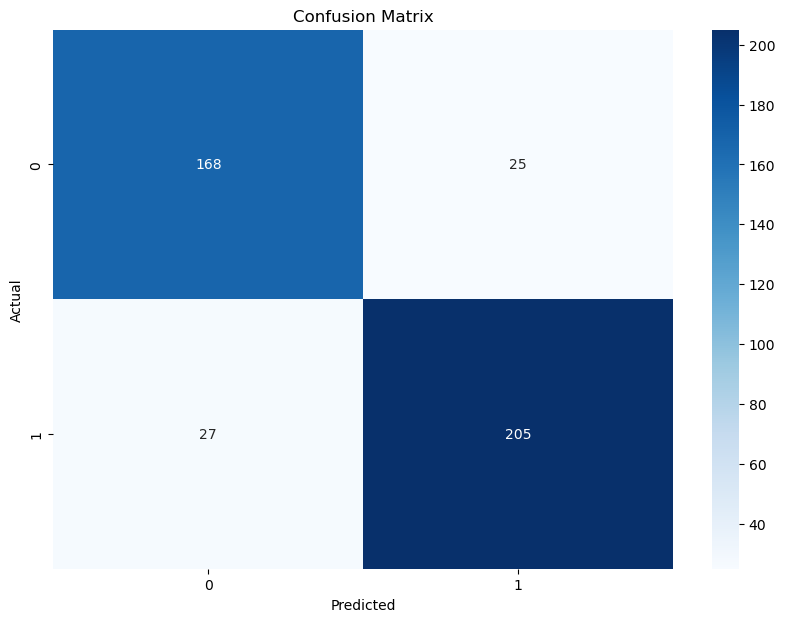

In [29]:
# Confusion Matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()